In [1]:
import pandas as pd

# -*- coding: utf-8 -*-
"""
@name: Week 3 Poisson GLM.py
@author: Ming-Long Lam, Ph.D.
@organization: University of Chicago
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas
import sys
# Set some options for printing all the columns
np.set_printoptions(precision = 10, threshold = sys.maxsize)
np.set_printoptions(linewidth = np.inf)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)
pandas.options.display.float_format = '{:,.10}'.format
import seaborn as sns
import math
from scipy.stats import chi2

sys.path.append('C:\\MScAnalytics\\Linear and Nonlinear Model\\Job')
import Regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [84]:
target = 'Churn'
int_pred = ["Dependents","Gender","MultipleLines","InternetService","PaperlessBilling","Partner","PhoneService","SeniorCitizen", "Contract","MonthlyCharges","Tenure","TotalCharges"]
claim_history = pandas.read_excel('Telco-Customer-Churn.xlsx')
cat_cols = ["Dependents","Gender","MultipleLines","InternetService","PaperlessBilling","Partner","PhoneService","SeniorCitizen", "Contract"]
# Only positive
claim_history.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No
1,0003-MKNFE,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No
2,0004-TLHLJ,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,"1,237.85",Yes
4,0013-EXCHZ,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes


In [86]:
train_data = claim_history.dropna()
train_data[target] = np.where(train_data[target] == "Yes",1,0)

C:\Users\yomaa\AppData\Local\Temp\ipykernel_13956\275312558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[target] = np.where(train_data[target] == "Yes",1,0)


In [87]:
yFreq = train_data.groupby(target).size()
overall_odds = yFreq[1] / yFreq[0]
overall_odds

0.36199883788495063

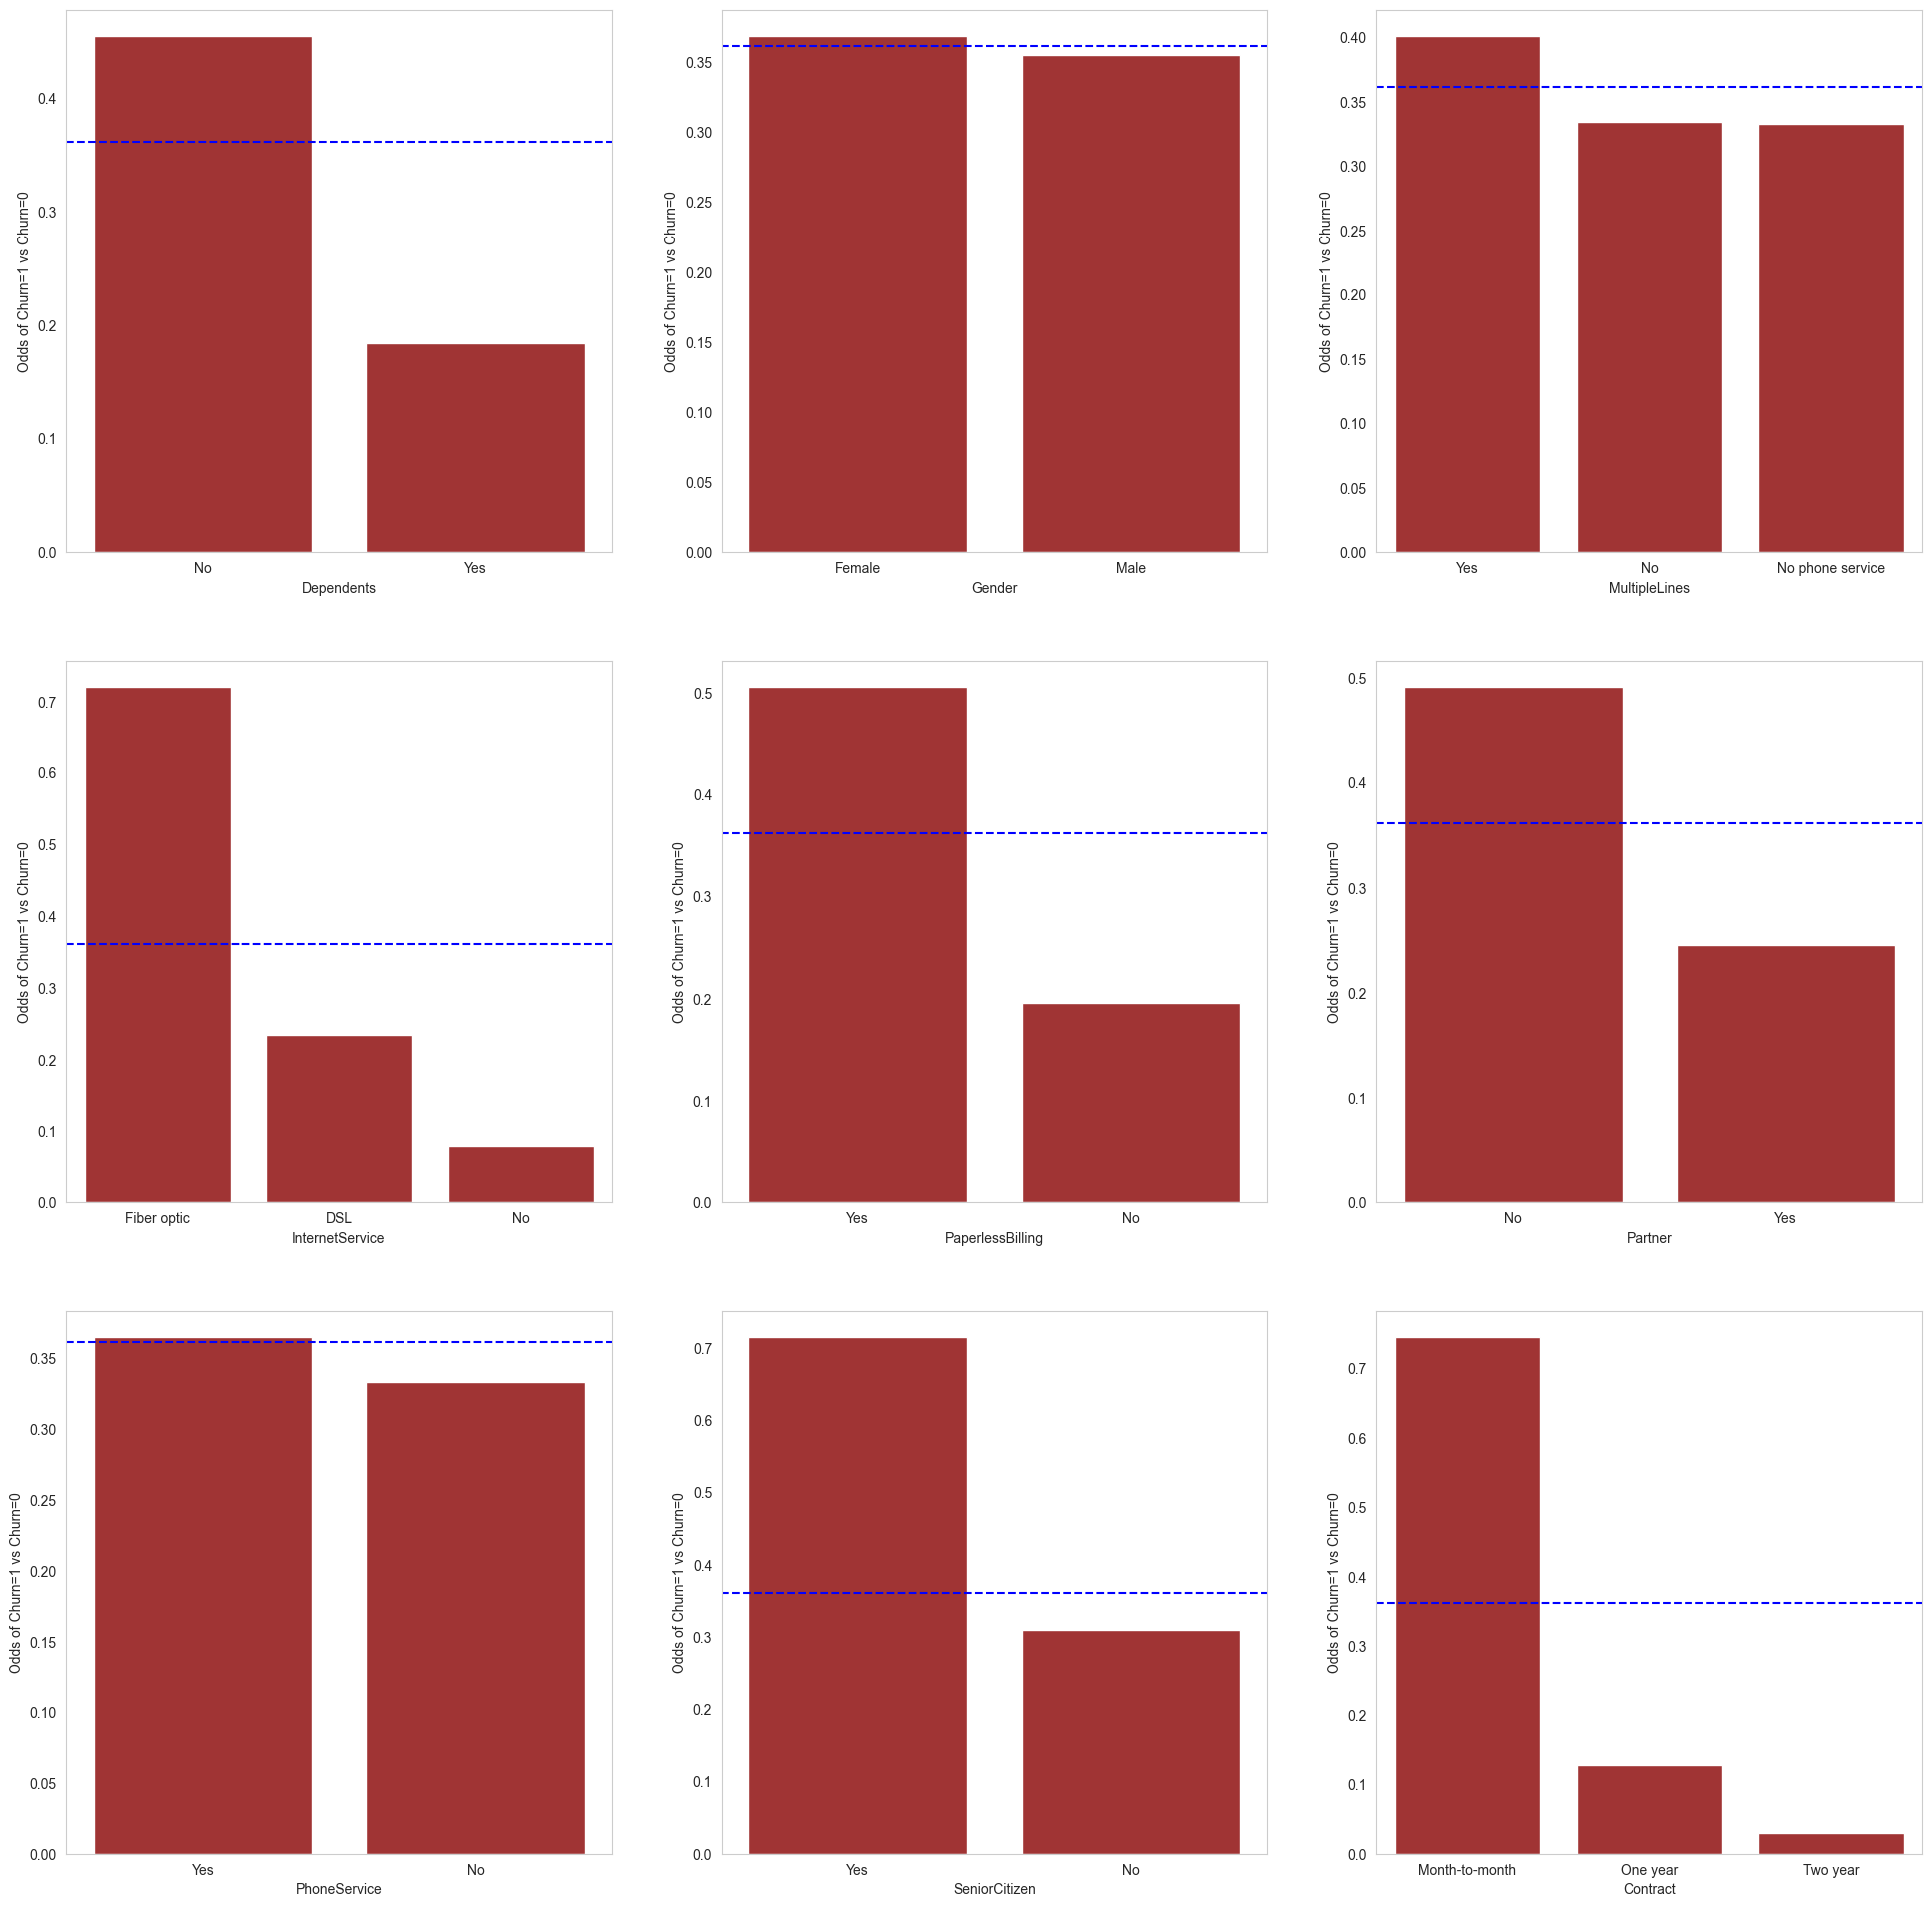

In [105]:

fig,axs = plt.subplots(math.ceil(len(cat_cols)/3),3, figsize = (24,24))
counter = 0
row_counter = 0
for i in cat_cols:
    xtab = pandas.crosstab(index = train_data[i], columns = train_data[target])
    xtab.reset_index(inplace = True)
    xtab['N'] = xtab[0] + xtab[1]
    xtab['Odds'] = xtab[1] / xtab[0]
    xtab.sort_values(by = 'Odds', inplace = True,ascending=False)
    plot = sns.barplot(xtab,x=i,y="Odds", color = 'firebrick',ax=axs[row_counter][counter])
    plot.axhline(y = overall_odds, color = 'blue', linestyle = '--', label = 'Overall Odds')
    plot.set_xlabel(i)
    plot.set_ylabel('Odds of Churn=1 vs Churn=0')
    plot.grid(axis ='y')
    if counter == 2:
        counter = 0
        row_counter+=1
    else:
        counter+=1

0     No
1    Yes
Name: Dependents, dtype: object